In [1]:
# Imports:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import re
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load and prepare the DataFrame:

df = pd.read_csv('./20190313_TW_Migrant-Migration.csv')

# Drop 'time' column and rename columns:
df.drop(['time'], axis=1, inplace=True)
df = df.rename(columns={"id_str":"tweetID",
                        "from_user":"authorScreen",
                        "text":"tweetText",
                        "created_at":"tweetTimeDate",
                        "geo_coordinates":"tweetGeo",
                        "user_lang":"authorLang",
                        "in_reply_to_user_id_str":"authorID_original",
                        "in_reply_to_screen_name":"authorScreen_original",
                        "from_user_id_str":"authorID",
                        "in_reply_to_status_id_str":"tweetID_original",
                        "source":"tweetMethod", 
                        "profile_image_url":"authorPicture",
                        "user_followers_count":"authorFollower",
                        "user_friends_count":"authorFriend",
                        "user_location":"authorLocation",
                        "status_url":"tweetURL",
                        "entities_str":"tweetEntities"})

# Reorder column names:
df.sort_index(axis=1, inplace=True)
df.head(2)

,authorFollower,authorFriend,authorID,authorID_original,authorLang,authorLocation,authorPicture,authorScreen,authorScreen_original,tweetEntities,tweetGeo,tweetID,tweetID_original,tweetMethod,tweetText,tweetTimeDate,tweetURL
0,197,579.0,5.642576e+08,NaN,en,NaN,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,darleneclarke5,NaN,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{""screen_name"":""ezralevant"",""name"":""Ezra Levant 🍁"",""id"":20878297,""id_str"":""20878297"",""indices"":[3,14]}],""urls"":[]}",NaN,1.102720e+18,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @ezralevant: Abdul Habash, a Syrian migrant to Canada, made a terrifying bomb threat against Jason Kenney. He and his dad told our reporter it’s no big deal — in fact, they’re mad the cops won’t give him his computer and phone back. #terrorists https://t.co/AujC0eU4Sk",Mon Mar 04 23:59:47 +0000 2019,http://twitter.com/darleneclarke5/statuses/1102720324875894785
1,940,225.0,3.109106e+09,NaN,en,top your momma,http://pbs.twimg.com/profile_images/1062099415421411333/EZCmOCeu_normal.jpg,BlueelvisEric,NaN,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{""screen_name"":""1776Stonewall"",""name"":""Stonewall Jackson"",""id"":800086706678419500,""id_str"":""800086706678419456"",""indices"":[3,17]}],""urls"":[{""url"":""https://t.co/CyucESMlFM"",""expanded_url"":""https://www.breitbart.com/border/2019/03/04/200-cases-of-mumps-confirmed-in-texas-migrant-detention-centers/"",""display_url"":""breitbart.com/border/2019/03…"",""indices"":[19,42]}]}",NaN,1.102720e+18,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @1776Stonewall: https://t.co/CyucESMlFM Texas health officials report that nearly 200 people contracted mumps in migrant detention facilities located across the state so far this fiscal year.,Mon Mar 04 23:59:40 +0000 2019,http://twitter.com/BlueelvisEric/statuses/1102720294035353606


In [3]:
tweets = df['tweetText'].tolist()

## Count number of retweets, replies, and other tweets:

In [4]:
number_of_retweets = 0
number_of_replies = 0
other_tweets = 0

for tweet in tweets:
    # Retweets
    if tweet.startswith('RT'):
        number_of_retweets += 1
        
    # Replies
    elif tweet.startswith('@'):
        number_of_replies += 1
    
    else:
        other_tweets += 1

print("There are a total of {} tweets. Breakdown:\nRetweets = {}\nReplies = {}\nOtherTweets = {}"\
      .format(len(tweets), number_of_retweets, number_of_replies, other_tweets))

There are a total of 123524 tweets. Breakdown:
Retweets = 97185
Replies = 8940
OtherTweets = 17399


## Word frequency distribution:

#### Preparing stopwords:

In [5]:
# Most frequently used langauges in our dataset
df['authorLang'].value_counts()[:4]

en    106942
fr    4523  
de    3016  
es    2488  
Name: authorLang, dtype: int64

In [6]:
# list of built-in stopwords for the top languages
languages = ['english', 'french', 'german', 'spanish']

STOPWORDS = []
for lang in languages:
    STOPWORDS.extend(stopwords.words(lang))

# Stopwords that I came across: amp represents '&' and "n't" is not
custom_stopwords = ["amp", "n't", "rt"]

STOPWORDS.extend(custom_stopwords)
print("4 languages + custom stopwords, we have a total of {} words.".format(len(STOPWORDS)))

4 languages + custom stopwords, we have a total of 855 words.


In [7]:
all_words = []

for tweet in tweets:
    words = word_tokenize(tweet)
    
    for w in words:
        word = w.lower() # change to lowercase
            
        if word[0].isalpha() and word not in STOPWORDS: # skip non-words and skip stopwords
            all_words.append(word)

print("There are a total of {} word tokens.".format(len(all_words))) # Includes repetition

There are a total of 2351687 word tokens.


In [8]:
word_freq = FreqDist(all_words) # Calculates the frequency of each word
print(word_freq.most_common(20)) # 20 most frequent words:

[('https', 107479), ('migrant', 64977), ('migration', 41411), ('border', 20936), ('children', 19814), ('trump', 11709), ('us', 11044), ('caravan', 10782), ('people', 8672), ('crisis', 8243), ('u.s.', 7449), ('migrants', 6711), ('families', 6262), ('via', 6155), ('thousands', 6149), ('say', 5789), ('new', 5648), ('kids', 5465), ('custody', 5354), ('one', 5007)]


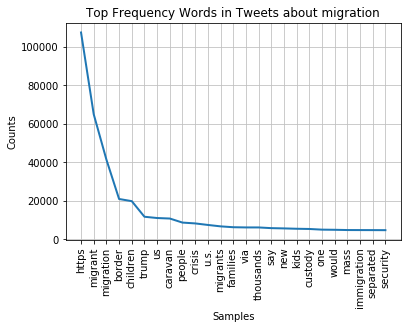

In [9]:
# Plot them:
word_freq.plot(25, title="Top Frequency Words in Tweets about migration")

## Explore the hashtags used in these tweets:

In [10]:
hashtags = []

for tweet in tweets:
    temp = [i for i in tweet.split() if i.startswith("#")]
    hts = [re.sub(r"(\W+)$", "", j) for j in temp]
    hashtags.extend(hts)
    
print("Total number of hashtags: {}\nNumber of unique hashtags: {}".format(len(hashtags), len(set(hashtags))))

Total number of hashtags: 69825
Number of unique hashtags: 10729


In [11]:
ht_count = Counter(hashtags)
print("Top 20 hashtags: ", ht_count.most_common(20))

Top 20 hashtags:  [('#migration', 1711), ('#BuildTheWall', 1264), ('#Migration', 956), ('#ma4t', 836), ('#migrant', 765), ('#Immigration', 696), ('#FoxNews', 689), ('#Venezuela', 678), ('#AsylumReformNow', 636), ('#TheResistance', 544), ('#CNN', 537), ('#BREAKING', 532), ('#MSNBC', 496), ('#Yahoo', 495), ('#FBRParty', 492), ('#DHS', 485), ('#MAGA', 469), ('#SundayThoughts', 431), ('#APeoplesJourney', 379), ('#Trump', 363)]


- We could consider further editing this built-in stopwords list. For eg- pronouns might be something we don't want to skip (?) or add more custom_stopwords.
- Tweets that begin with RT is a Retweet, and those that begin with @ is a Reply.
- 79% are Retweets; 7% are Replies; and 14% are other (original) tweets.
- #BuildTheWall is a pretty popular hashtag!
- Trump, wall, security, border are among the most frequent words.